<a href="https://colab.research.google.com/github/saurabh423/Linear-Regression-Model-for-CAR-DEKHO.com/blob/main/Self_Project_of_Car_Dekho_Linear_Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## <b> CarDekho.com is India's leading car search venture that helps users buy cars that are right for them. Its website and app carry rich automotive content such as expert reviews, detailed specs and prices, comparisons as well as videos and pictures of all car brands and models available in India. The company has tie-ups with many auto manufacturers, more than 4000 car dealers and numerous financial institutions to facilitate the purchase of vehicles.

## <b> CarDekho.com has launched many innovative features to ensure that users get an immersive experience of the car model before visiting a dealer showroom. These include a Feel The Car tool that gives 360-degree interior/exterior views with sounds of the car and explanations of features with videos; search and comparison by make, model, price, features; and live offers and promotions in all cities. The platform also has used car classifieds wherein users can upload their cars for sale, and find used cars for buying from individuals and used car dealers.

## <b> Besides the above consumer product features, CarDekho.com provides a rich array of tech-enabled tools to OE manufacturers and car dealers. These include apps for dealer sales executives to manage leads, cloud services for tracking sales performance, call tracker solution, digital marketing support, virtual online showroom and outsourced lead management operational process for taking consumers from enquiry to sale.

## <b> Our vision is to construct a complete ecosystem for consumers and car manufacturers, dealers and related businesses such that consumers have easy and complete access to not only buying and selling cars, but also manage their entire ownership experience, be it accessories, tyres, batteries, insurance or roadside assistance. </b>

## <b>In this project, the dataset contains information about used cars listed on www.cardekho.com. This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.</b>

## <b>The columns in the given dataset are as follows:</b>

- ### name
- ### year
- ### selling_price
- ### km_driven
- ### fuel
- ### seller_type
- ### transmission
- ### Owner

## <b>Load up this dataset in the kernel and perform initial exploratory data analysis (EDA). You should also try creating new features based on the existing ones. The dependent variable is the <code>selling_price</code>. 

## <b> Your task is to build a linear regression model on this dataset (always split into train and test). Evaluate the fitted model on test data using different regression metrics. Also use your linear regression model from <code>statsmodels.api</code> to run a similar regression and obtain parameter inferences for each of the model variables. Next, you need to try if regularizing your model helps you perform well on the test dataset. For this, use <code> Ridge</code> and <code>Lasso</code> regressions on the dataset and check for different values of the tuning parameter ($\lambda$ or $\alpha$ , do not confuse this $\alpha$ with the learning rate.) For each of the above regressions, get the feature importances using the regression coefficients.

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


First step is to mounting the drive then uploading the data set.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df= pd.read_csv('/content/drive/MyDrive/Almabetter/Module 4: Machine Learning/Week 1: Introduction to ML/Day 6/Self Project/dat/Copy of car data.csv')

### Data Inspection

In [5]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


## <b>The columns in the given dataset are as follows:</b>

- ### Car_Name : Name of the Car.
- ### Year : The year when the car is manufactured
- ### Selling_Price : Price of the car after using (Dependent Variable)
- ### Present_Price : Present Price of the car in market
- ### Kms_Driven : How many Kilometers the car is drived
- ### Fuel_Type : Fuel type of car
- ### Seller_Type : Seller person type (Categorical Variable)
- ### Transmission : Vehicle to change gears (Categorical Variable)
- ### Owner : How many people is/are owner of the car 

In [6]:
df.shape

(301, 9)

In [7]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

From above code we get the number of records and columns present in our dataset.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


- Check Null / Missing values

In [9]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

From above it seems that there are **301 entries** or rows and **8 columns** or features & there are no null values present in any feature, so there is **no need for Null value imputation**.

# **Now Let's do the Exploratory Data Analysis & Feature Selection**

*   **Understanding the dataset**

Now if we observe the above dataset, the **Car_Name** column has of no importance to our analysis.

So, what we’ll do is, we’ll drop the **Car_Name** column 

In [10]:
df.drop(['Car_Name'],axis=1, inplace=True)
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


**Creating new features**

We'll create our new feature  with name Current_year and assigning value 2021. This will help will in getting , How old the Car is ?

Also we'll create one more new feature column with name no_year (Number of years)

In [11]:
df['Current_Year'] = 2021
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021


In [12]:
df['no_year'] = df['Current_Year'] - df['Year']
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,no_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,4
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021,10
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021,7


Now we'll drop the **Current_Year** and **Year** column from our data set.

Since, it'll be no of use

In [13]:
df = df.drop(['Current_Year','Year'], axis=1)

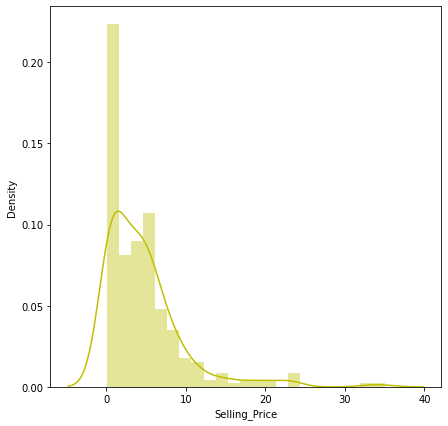

In [17]:
# Dependent variable 'Selling_Price'
plt.figure(figsize=(7,7))
sns.distplot(df['Selling_Price'],color="y")

-Now, Removing or modifying the right skewness with the help of log transformation

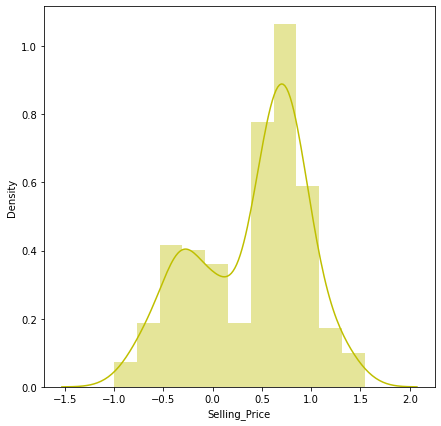

In [18]:
# Dependent variable 'Selling_Price'
plt.figure(figsize=(7,7))
sns.distplot(np.log10(df['Selling_Price']),color="y")

In [19]:
numeric_features = df.describe().columns

In [20]:
numeric_features

Index(['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner', 'no_year'], dtype='object')

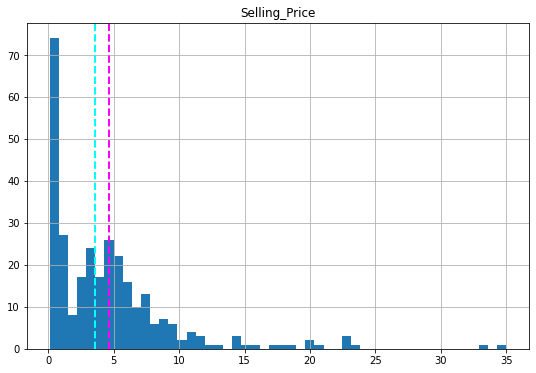

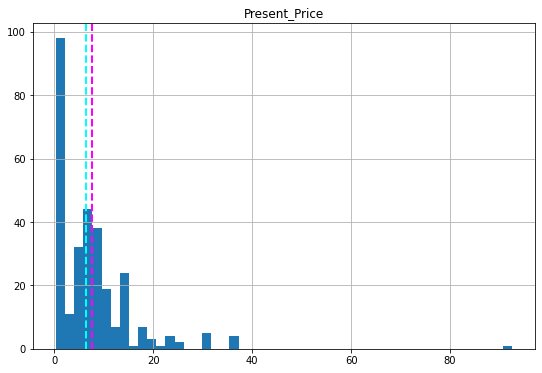

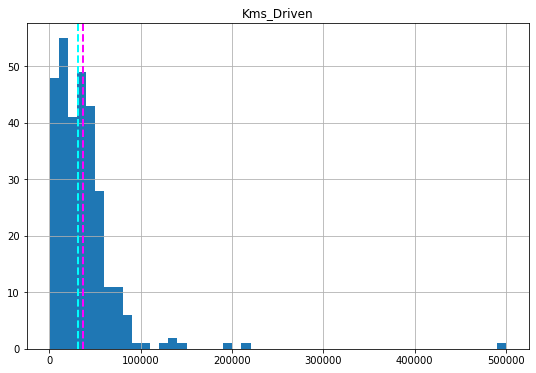

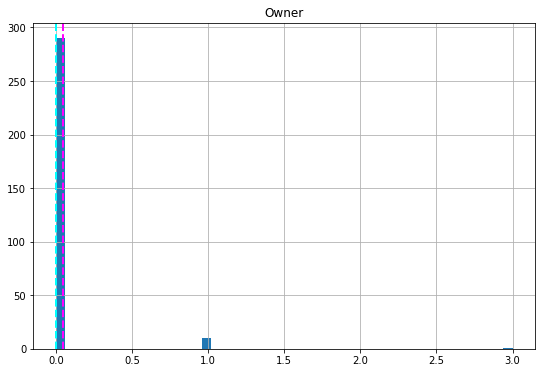

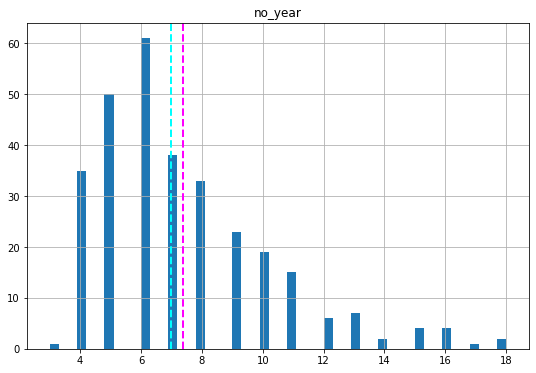

In [21]:
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

From above it's clear that our numeric data is right skewed for some columns..
Let's try to make it noraml distribution..by tranforming the data into some other form..and then visualize the thing..

## **Transformation**

---
Below are the some type of method or way to deal above type of problem.

**square-root for moderate skew:** sqrt(x) for positively skewed data, sqrt(max(x+1) - x) for negatively skewed data

**log for greater skew:** log10(x) for positively skewed data, log10(max(x+1) - x) for negatively skewed data

**inverse for severe skew:** 1/x for positively skewed data 1/(max(x+1) - x) for negatively skewed data

**Linearity and heteroscedasticity:** First try log transformation in a situation where the dependent variable starts to increase more rapidly with increasing independent variable values If your data does the opposite – dependent variable values decrease more rapidly with increasing independent variable values – you can first consider a square transformation.

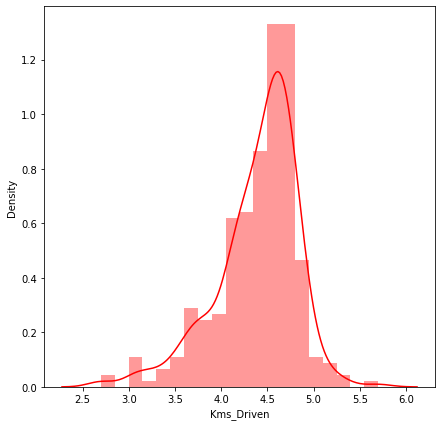

In [22]:
# Independent variable 'Kms_Driven'
plt.figure(figsize=(7,7))
sns.distplot(np.log10(df['Kms_Driven']),color="r")

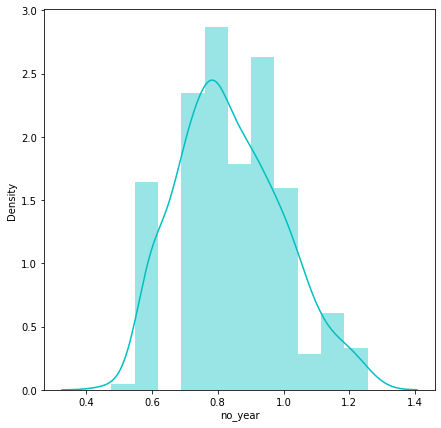

In [23]:
# Independent variable 'no_year'
plt.figure(figsize=(7,7))
sns.distplot(np.log10(df['no_year']),color="c")

# **Analysis of Categorical Data**

---
In statistics, a categorical variable is a variable that can take on one of a limited, and usually fixed, number of possible values, assigning each individual or other unit of observation to a particular group or nominal category on the basis of some qualitative property.


In [24]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Selling_Price  301 non-null    float64
 1   Present_Price  301 non-null    float64
 2   Kms_Driven     301 non-null    int64  
 3   Fuel_Type      301 non-null    object 
 4   Seller_Type    301 non-null    object 
 5   Transmission   301 non-null    object 
 6   Owner          301 non-null    int64  
 7   no_year        301 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 18.9+ KB


As we can see from above we've 3 features which are of category type **Fuel_Type, Seller_Type, Transmission.**

In [26]:
categorical_features = df.describe(include=['object','category']).columns

In [27]:
categorical_features

Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

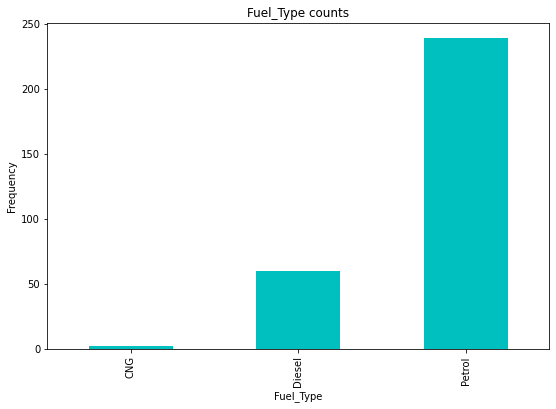

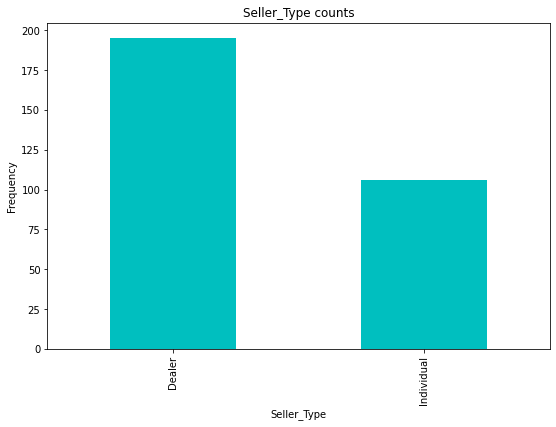

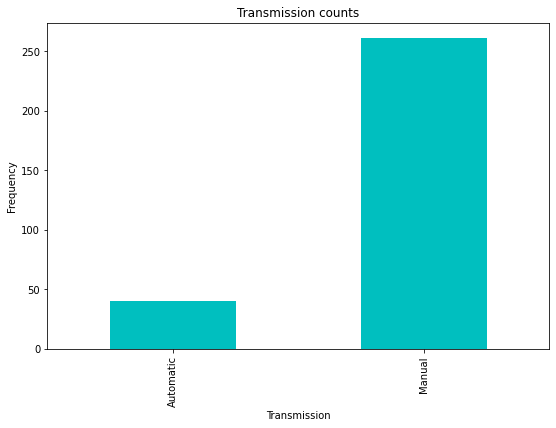

In [28]:
# plot a bar plot for each categorical feature count  
for col in categorical_features:
    counts = df[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='c')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

Here we can see that:

*  Most of the cars owned by the people are of Petrol Type.

*  People are buying more petrol Cars then Diesel and CNG.

*  Most of the seller type is Dealers only.

* Most of the cars are owned by the first owner.

* Second-hand cars are less in number.



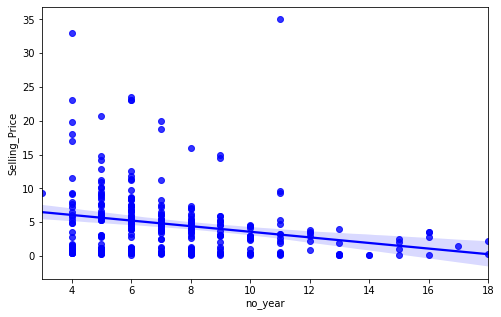

In [29]:
plt.figure(figsize=(8,5))
sns.regplot(x='no_year',y='Selling_Price',data=df,color='b')

In [30]:
df['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

Then I do: 1= Petrol, 2= Diesel and 3= CNG

In [31]:
df['Fuel_type'] = df.Fuel_Type.map({'Petrol':1, 'Diesel':2, 'CNG':3})

In [32]:
df['Seller_Type'].unique()

array(['Dealer', 'Individual'], dtype=object)

Then I do: 1= Dealer, 2= Individual 

In [33]:
df['Seller_type'] = df.Seller_Type.map({'Dealer':1, 'Individual':2})

In [34]:
df['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

Then I do: 1= Manual, 2= Automatic

In [35]:
df['transmission'] = df.Transmission.map({'Manual':1, 'Automatic':2})

In [36]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_year,Fuel_type,Seller_type,transmission
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7,1,1,1
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8,2,1,1
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4,1,1,1
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10,1,1,1
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7,2,1,1


Now we see the correlation of **ALL FEATURES**

In [37]:
df.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_type,Seller_type,transmission
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.509467,-0.550724,0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.440415,-0.512030,0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.166801,-0.101419,0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.055705,0.124269,0.050316
no_year,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.053643,0.039896,0.000394
Fuel_type,0.509467,0.440415,0.166801,-0.055705,-0.053643,1.000000,-0.352415,0.080466
Seller_type,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.352415,1.000000,-0.063240
transmission,0.367128,0.348715,0.162510,0.050316,0.000394,0.080466,-0.063240,1.000000


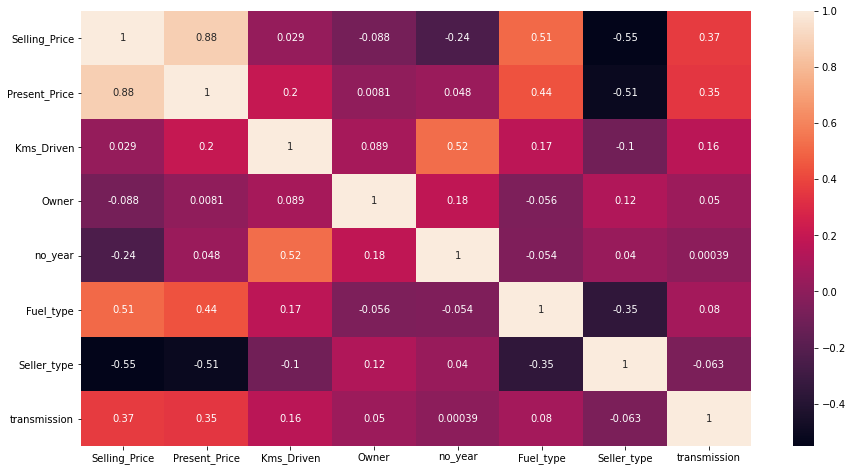

In [38]:
corrMatrix = df.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corrMatrix, annot=True)
plt.show()

* The selling price and Present price have a correlation of 0.88.
* The Selling Price is highly correlated with the Present Price, so we can use any one of the Variables for our analysis but not both.

Now we check the **Variance Inflation Factor (VIF)** for each numeric feature

In [39]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [40]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Selling_Price']]])

,variables,VIF
0,Present_Price,3.172646
1,Kms_Driven,2.742957
2,Owner,1.073716
3,no_year,8.828839
4,Fuel_type,8.010454
5,Seller_type,9.107680
6,transmission,11.230488


As we see from above the **VIF** is less than 10 so we can consider the all numeric features for our model.

In [41]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_year,Fuel_type,Seller_type,transmission
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7,1,1,1
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8,2,1,1
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4,1,1,1
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10,1,1,1
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7,2,1,1


# **Linear Regression Model**

In [42]:
df.columns[1:]

Index(['Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type',
       'Transmission', 'Owner', 'no_year', 'Fuel_type', 'Seller_type',
       'transmission'],
      dtype='object')

In [43]:
# Splitting dataset based Dependent and Independent features
X = df[['Present_Price', 'Kms_Driven', 'Owner', 'no_year', 'Fuel_type', 'Seller_type',
       'transmission']]
y = df['Selling_Price']

In [44]:
# Splitting dataset into testing and training
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(240, 7)
(61, 7)


In [45]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)

In [46]:
reg.score(X_train, y_train)

0.8800552541363666

In [47]:
reg.coef_

array([ 5.20017304e-01, -6.98972222e-06, -1.21115856e+00, -4.21942291e-01,
        1.40212878e+00, -5.72735817e-01,  7.29954497e-01])

In [48]:
y_pred = reg.predict(X_test)


In [49]:
y_pred

array([ 1.6321191 ,  6.48439739,  0.43860979,  8.75154047,  1.92385506,
        5.32378933,  2.67305228,  1.8804137 ,  8.59775009,  5.34097705,
        0.2949424 ,  0.09112481,  5.08321878,  1.1993604 ,  7.04204269,
        3.38953   , 17.57772764,  3.59812708,  5.24342747,  1.63332016,
       -3.69608927,  2.65208312,  1.44798654,  3.57154507,  3.71205878,
       -0.51841504,  1.90767333, 10.35599634,  6.20777703, -3.92227174,
        2.66376612,  6.5197373 , -0.11288127,  9.18107687, -1.23207244,
        4.15217755, -3.11338337,  5.03903706, -1.05812133,  1.33436144,
        9.85803285, 48.31664818,  1.52710479,  6.01834376,  3.1661854 ,
        2.65418003,  4.29436765,  3.04285447,  6.61883733, 19.1860509 ,
        0.39955609,  0.40691262,  6.12203781,  1.0822694 ,  5.67181849,
       14.56769096,  2.06250371,  5.69559609, -2.2094131 ,  6.88261248,
       17.49018821])

## **Regression Evaluation Metrics**

---


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error (MAE)** is the mean of the absolute value of the errors:

1n∑i=1n|yi−y^i| 
 
**Mean Squared Error (MSE)** is the mean of the squared errors:

1n∑i=1n(yi−y^i)2
 
Root Mean Squared Error (RMSE) **bold text** is the square root of the mean of the squared errors:

1n∑i=√1n(yi−y^i)2
 
Comparing these metrics:

MAE is the easiest to understand, because it's the average error.
<br>MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
<br>RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.
<br>All of these are loss functions, because we want to minimize them.

In [86]:
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error((y_test), (y_pred))
print("MSE :" , MSE)

MAE=mean_absolute_error((y_test), (y_pred))
print("MAE :" ,MAE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 6.372632030548448
MAE : 1.5537386682835732
RMSE : 2.524407263210207


In [87]:
r2 = r2_score((y_test), (y_pred))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.8431657974447182
Adjusted R2 :  0.8224518461638319


Text(0, 0.5, 'Predicted selling price')

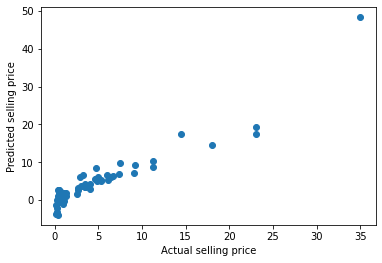

In [88]:
plt.scatter((y_test), (y_pred))
plt.xlabel('Actual selling price')
plt.ylabel('Predicted selling price')

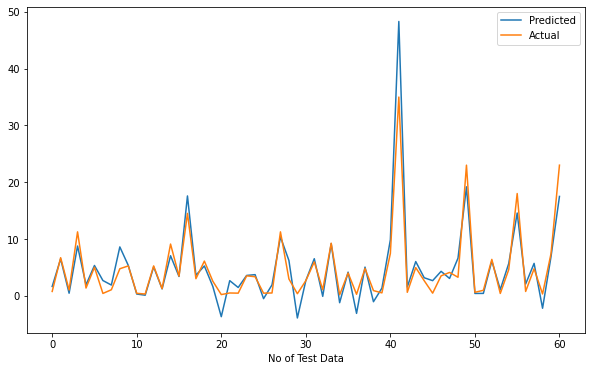

In [90]:
plt.figure(figsize=(10,6))
plt.plot((y_pred))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

# **Residuals:**

---
A residual is the vertical distance between a data point and the regression line. Each data point has one residual. They are positive if they are above the regression line and negative if they are below the regression line.


Text(0.5, 0.98, 'Residual Analysis')

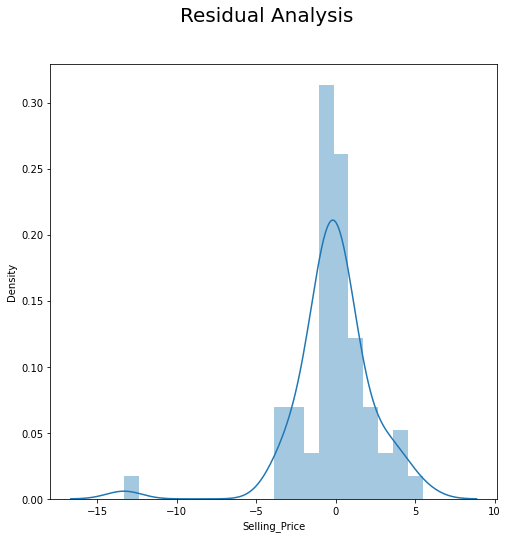

In [93]:
fig=plt.figure(figsize=(8,8))
  
sns.distplot(((y_test)- (y_pred)),bins=20)

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)   

Let's find out the Hetroscadacity....

Text(0, 0.5, 'residuals')

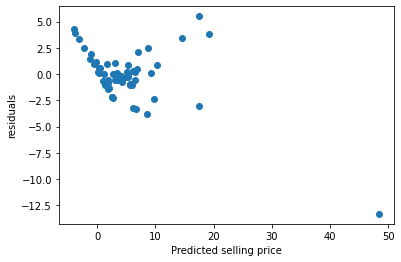

In [94]:
### Heteroscadacity
plt.scatter((y_pred),(y_test)-(y_pred))
plt.xlabel('Predicted selling price')
plt.ylabel('residuals')


# **Linear regression model from statsmodels.api**

 **Regression:**
Regression analysis consists of a set of machine learning methods that allow us to predict a continuous outcome variable (y) based on the value of one or multiple predictor variables (x). Briefly, the goal of the regression model is to build a mathematical equation that defines y as a function of the x variables.

**Feature Scaling:**

We will apply StandardScaler as StandardScaler assumes your data is normally distributed within each feature and will scale them so that the distribution is now centered around 0, with a standard deviation of 1.

-Now we will do the regression with the Help of Ols from the stats model library:


In [52]:
import statsmodels.api as sm

In [53]:
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

In [54]:
# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling_Price   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     302.7
Date:                Tue, 25 May 2021   Prob (F-statistic):          4.43e-130
Time:                        09:25:30   Log-Likelihood:                -598.73
No. Observations:                 301   AIC:                             1213.
Df Residuals:                     293   BIC:                             1243.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.5633      0.703      3.646      0.000       1.180       3.947
Present_Price     0.4460      0.016     27.908      0.000       0.415       0.477
Kms_Driven    -6.374e-06   3.27e-06     -1.948      0.052   -1.28e-05    6.67e-08
Owner            -0.6806      0.429     -1.586      0.114      -1.525       0.164
no_year          -0.4039      0.043     -9.299      0.000      -0.489      -0.318
Fuel_type         1.4930      0.280      5.340      0.000       0.943       2.043
Seller_type      -1.1037      0.260     -4.239      0.000      -1.616      -0.591
transmission      1.4304      0.333      4.297      0.000       0.775       2.086
==============================================================================
Omnibus:                       88.219   Durbin-Watson:                   1.757
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              670.700
Skew:                           0.963   Prob(JB):                    2.29e-146
Kurtosis:                      10.055   Cond. No.                     3.92e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.92e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Here we can see that:

* We are achieving the R_squared of 0.880 which is quite good.

* We need to have a look at Adjusted R_sqr and P-value as it will help us in tunning the model further.

Now we will further tune the model:

Let us remove the Owner variable as it is more than our p-Value i.e.(0.05) acting like insignificant. We also checked our Adj R_sqr should not drop

So, now we select the features such as: **'Kms_Driven', 'Present_Price',  'no_year', 'Fuel_type', 'Seller_type' & 'transmission'** for our model.


# **Implementing Lasso regression**

---
Lasso regression is a type of linear regression that uses shrinkage. Shrinkage is where data values are shrunk towards a central point, like the mean. The lasso procedure encourages simple, sparse models (i.e. models with fewer parameters).

In [58]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.005 , max_iter= 3000)

lasso.fit(X_train, y_train)

Lasso(alpha=0.005, copy_X=True, fit_intercept=True, max_iter=3000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [59]:
lasso.score(X_train, y_train)

0.8800036540393756

In [60]:
y_pred_l = lasso.predict(X_test)

In [64]:
MSE  = mean_squared_error((y_test),(y_pred_l))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred_l))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_l)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 6.465370909209978
RMSE : 2.542709363889231
R2 : 0.8408834393843392
Adjusted R2 :  0.8198680445860443


Text(0, 0.5, 'Predicted selling price')

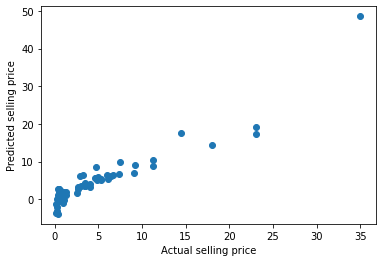

In [72]:
plt.scatter((y_test), (y_pred_l))
plt.xlabel('Actual selling price')
plt.ylabel('Predicted selling price')

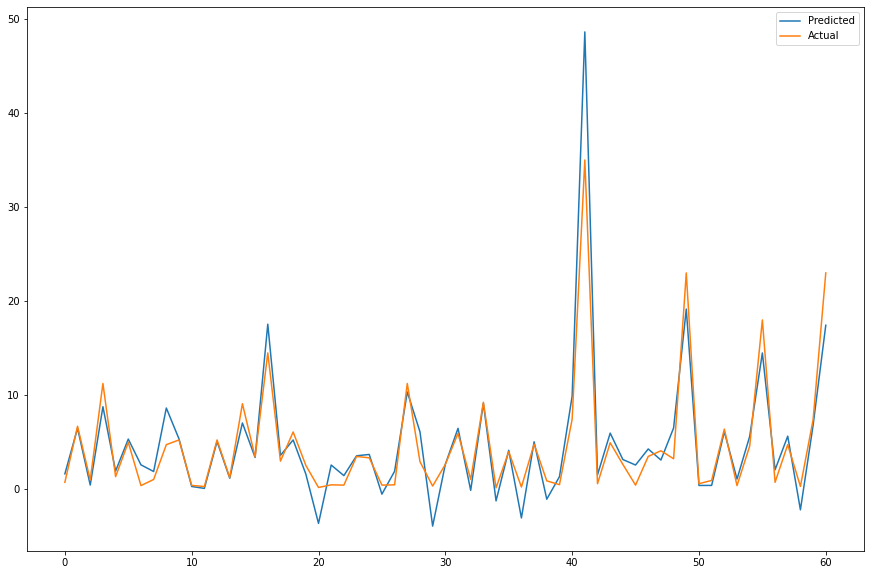

In [73]:
plt.figure(figsize=(15,10))
plt.plot((y_pred_l))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

# **The Cross-Validation Procedure for Lasso Regression**

In [66]:
from sklearn.model_selection import GridSearchCV

In [67]:
### Cross validation
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [68]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.1}

Using  {'alpha': 0.1}  the negative mean squared error is:  -5.110117317500389


In [69]:
#Model Prediction
y_pred_lasso = lasso_regressor.predict(X_test)

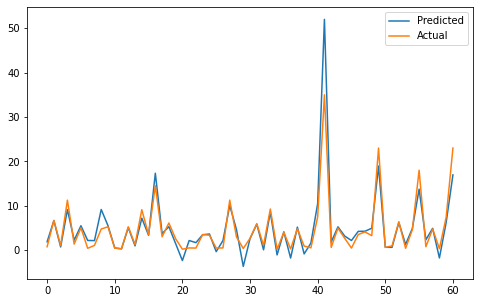

In [71]:
plt.figure(figsize=(8,5))
plt.plot((y_pred_lasso))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [74]:
MSE  = mean_squared_error((y_test), (y_pred_lasso))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred_lasso))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 7.845756697550835
RMSE : 2.801027793070043
R2 : 0.8069113375439556
Adjusted R2 :  0.7814090613705158



# **<br>Implementing Ridge Regression**
---
Ridge regression is a way to create a parsimonious model when the number of predictor variables in a set exceeds the number of observations, or when a data set has multicollinearity (correlations between predictor variables).


In [75]:
from sklearn.linear_model import Ridge

ridge  = Ridge(alpha=0.1)

In [76]:
ridge.fit(X_train,y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [77]:
ridge.score(X_train, y_train)

0.8800548630091464

In [78]:
#Model Prediction
y_pred_r = ridge.predict(X_test)

In [79]:
MSE  = mean_squared_error((y_test), (y_pred_r))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred_r))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 6.3772994159703105
RMSE : 2.525331545752025
R2 : 0.8430509303588506
Adjusted R2 :  0.8223218079534158


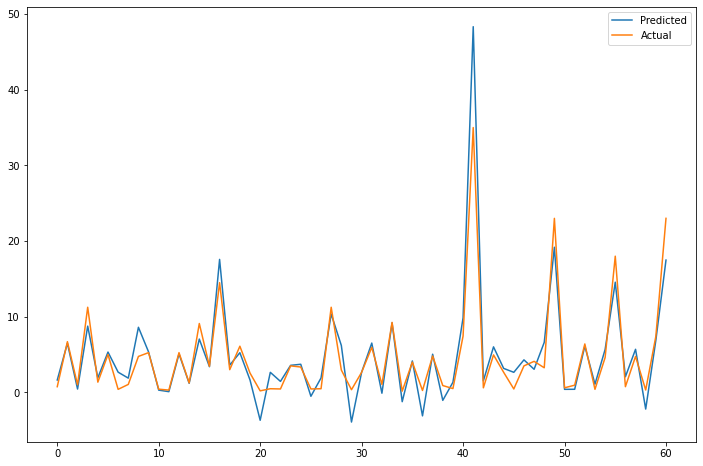

In [97]:
plt.figure(figsize=(12,8))
plt.plot((y_pred_r))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

# **The Cross-Validation Procedure for Ridge Regression**

<b> Running Grid Search Cross Validation for Ridge Regression </b>

In [80]:
# Hyperprarameter tuning
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [81]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 60}

Using  {'alpha': 60}  the negative mean squared error is:  -4.811068843294656


In [82]:
#Model Prediction
y_pred_ridge = ridge_regressor.predict(X_test)

In [83]:
MSE  = mean_squared_error((y_test), (y_pred_ridge))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred_ridge))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 7.5107453345764315
RMSE : 2.7405739060599026
R2 : 0.8151561631838453
Adjusted R2 :  0.7907428262458627


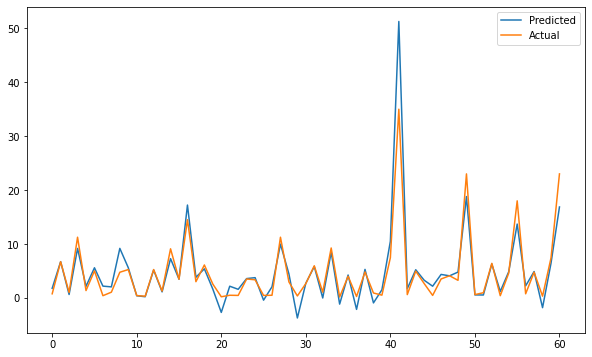

In [85]:
plt.figure(figsize=(10,6))
plt.plot((y_pred_ridge))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

Text(0.5, 0.98, 'Residual Analysis')

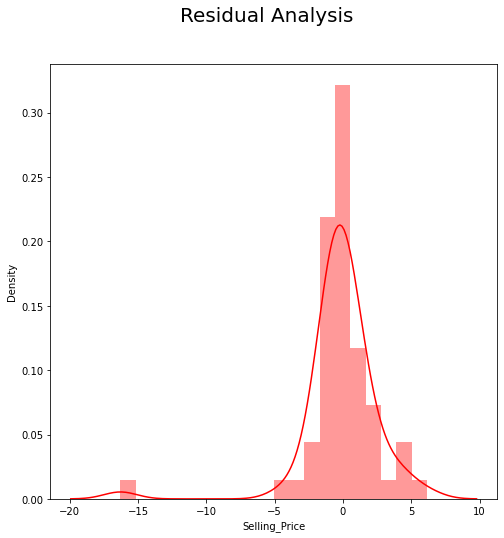

In [95]:
#Resuldual Analysis
fig=plt.figure(figsize=(8,8))
  
sns.distplot(((y_test)- (y_pred_ridge)),bins=20,color='r')

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)   

Text(0, 0.5, 'residuals')

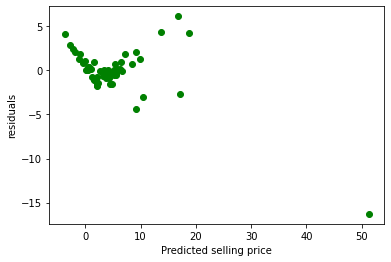

In [96]:
### Heteroscadacity
plt.scatter((y_pred_ridge),(y_test)-(y_pred_ridge),c='g')
plt.xlabel('Predicted selling price')
plt.ylabel('residuals')

# **Implementing Elastic net Regression**

-----------
Elastic net regression is nothing but the combination of Lasso & Ridge Regression.

In [98]:
from sklearn.linear_model import ElasticNet
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [99]:
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [100]:
elasticnet.score(X_train, y_train)

0.872607338008909

In [101]:
y_pred_en = elasticnet.predict(X_test)

In [102]:
MSE  = mean_squared_error((y_test), (y_pred_en))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test),(y_pred_en))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 7.561852022038809
RMSE : 2.7498821833014606
R2 : 0.8138983977056282
Adjusted R2 :  0.7893189407988244


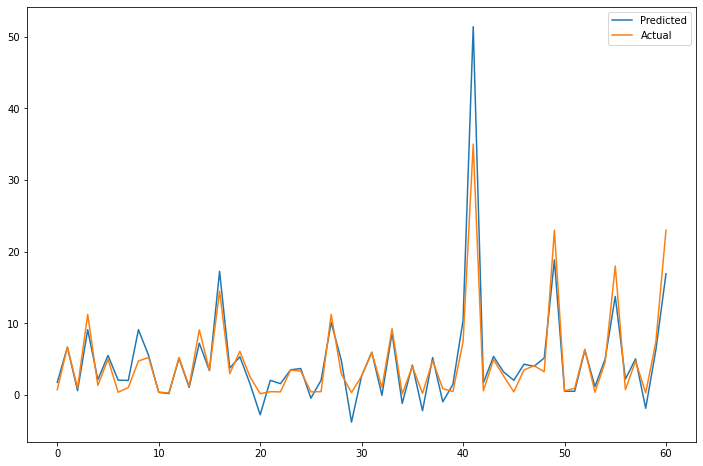

In [103]:
plt.figure(figsize=(12,8))
plt.plot((y_pred_en))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

# <b> Running Grid Search Cross Validation for ELastic Net Regression

In [104]:
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [105]:
y_pred_elastic = elastic_regressor.predict(X_test)

In [106]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.1, 'l1_ratio': 0.3}

Using  {'alpha': 0.1, 'l1_ratio': 0.3}  the negative mean squared error is:  -4.567432651940916


In [107]:
MSE  = mean_squared_error((y_test), (y_pred_elastic))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred_elastic))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_elastic)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 7.40872383789056
RMSE : 2.7218971027374566
R2 : 0.8176669719045628
Adjusted R2 :  0.7935852512127126


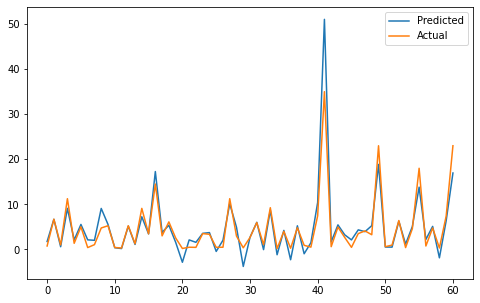

In [109]:
plt.figure(figsize=(8,5))
plt.plot((y_pred_elastic))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

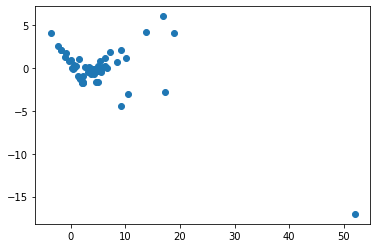

In [110]:
### Heteroscadacity
plt.scatter((y_pred_lasso),(y_test)-(y_pred_lasso))

In [111]:
(y_pred_lasso)

array([ 1.8627672 ,  6.63557925,  0.70364057,  9.11793841,  2.23931526,
        5.4858221 ,  2.16963409,  2.13346241,  9.14781185,  5.49943007,
        0.47066849,  0.28513328,  5.04818761,  0.95136824,  7.19517317,
        3.33411733, 17.32672885,  3.70615824,  5.28411267,  1.46790848,
       -2.37129281,  2.15303227,  1.67509422,  3.45405568,  3.62273874,
       -0.35260389,  2.14642117, 10.06236005,  4.59834723, -3.69228738,
        2.57261527,  5.83983872,  0.05708215,  8.55307564, -1.09589756,
        4.11240787, -1.80256849,  5.17981773, -0.86577154,  1.5867455 ,
       10.47903168, 52.01435058,  1.7860694 ,  5.24251946,  3.14610287,
        2.15469245,  4.21901484,  4.24676991,  4.9263576 , 18.92222299,
        0.62921903,  0.61627681,  6.19828315,  1.2797766 ,  4.86827372,
       13.73399845,  2.3221731 ,  4.89998845, -1.78267962,  6.23863767,
       16.95329435])

In [112]:
(y_test)

127     0.75
269     6.70
123     1.00
212    11.25
105     1.35
       ...  
130     0.75
65      4.75
179     0.31
285     7.40
82     23.00
Name: Selling_Price, Length: 61, dtype: float64

# **Conclusion:**

From above model we can conclude that below point:

*  Automatic vehicles fetch higher selling price compared to manual ones.
*  Age of the vehicle seems to show negative correlation with selling price.
* Owners and Kms_Driven are showing very less correlation with selling price.
*  selling price  of cars with Fuel type-CNG is higher as comapre to Patrol & Diegel.
